<a href="https://colab.research.google.com/github/Vidikkk/NM_dz/blob/main/%D0%9B%D0%913_%D0%9B%D0%B0%D0%BD%D0%BE%D0%B2%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9E%D0%BB%D0%B5%D0%B3_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_16_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 3
Лановенко Олег
Варінт 16
ФІТ 2-10

In [27]:
!pip install numdifftools

In [28]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np
import numdifftools as nd

def f(x):
    return 2 * x**4 - 2 * x**3 - 4* x**2 + 6 * x + 5


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-5, 5, 0.1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')



Found segment:  [-1.3, -1.2]
Found segment:  [-0.8, -0.7]


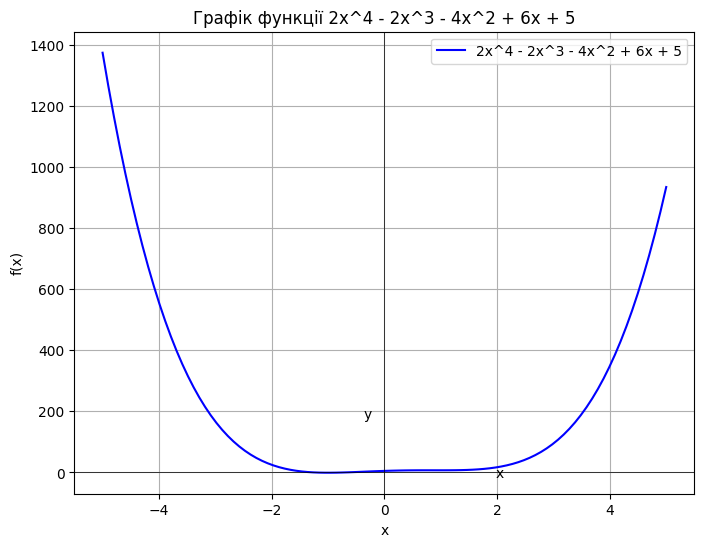

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 2 * x**4 - 2 * x**3 - 4* x**2 + 6 * x + 5

# Генерація значень x
x = np.linspace(-5, 5, 100)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='2x^4 - 2x^3 - 4x^2 + 6x + 5', color='blue')
plt.title('Графік функції 2x^4 - 2x^3 - 4x^2 + 6x + 5')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 190, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()


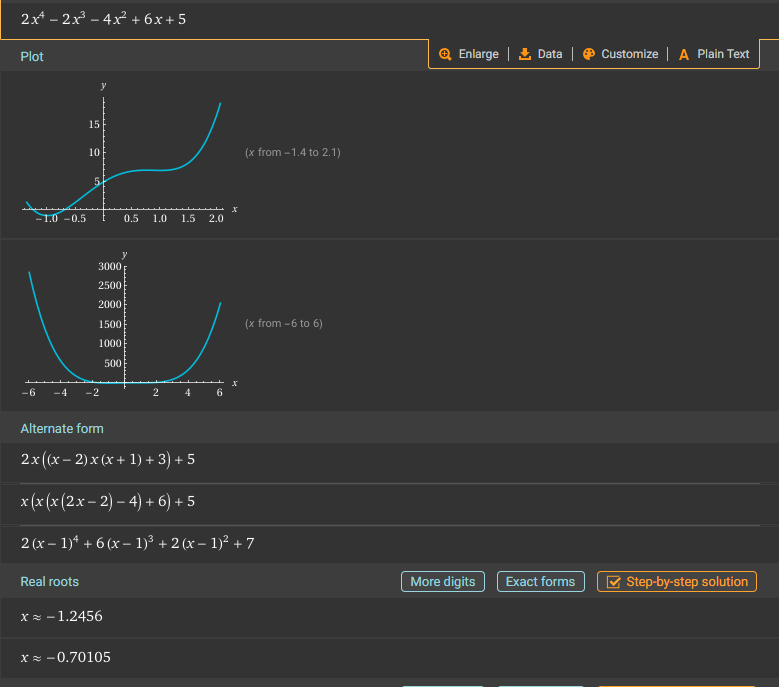

In [30]:
#Лабораторна робота. Метод половинного ділення, хорд

def rec(a, b, eps):  # метод половинного ділення
    while (abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x= ', round(x, 5), '  -   Half division method')

In [31]:
def hord(a, b, eps):  # метод хорд
    derivative_f = nd.Derivative(f, n=2)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (np.abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Chord method')


In [32]:
if __name__ == "__main__":
    a1, b1 = -1.3, -1.2
    a2, b2 = -0.8, -0.7
    eps = 0.0001
    print("Розв'язки на відрізку [-1.3, -1.2]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [-0.8, -0.7]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)

Розв'язки на відрізку [-1.3, -1.2]
x=  -1.24565   -   Half division method
x=  -1.2456   -   Chord method

 Розв'язки на відрізку [-0.8, -0.7]
x=  -0.70103   -   Half division method
x=  -0.70105   -   Chord method


In [33]:

import sympy as sym

x, a, b, c = sym.symbols('x, a, b, c')
f_sym = 2 * x**4 - 2 * x**3 - 4* x**2 + 6 * x + 5
s = sym.solve(f_sym, x)
print(s)


[1/4 + sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))/2 - sqrt(-2*(sqrt(18921)/288 + 1201/864)**(1/3) - 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) - 15/(4*sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))) + 19/6)/2, 1/4 + sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))/2 + sqrt(-2*(sqrt(18921)/288 + 1201/864)**(1/3) - 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) - 15/(4*sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))) + 19/6)/2, -sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))/2 + 1/4 + sqrt(-2*(sqrt(18921)/288 + 1201/864)**(1/3) - 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 15/(4*sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)**(1/3)) + 2*(sqrt(18921)/288 + 1201/864)**(1/3))) + 19/6)/2, -sqrt(19/12 + 43/(18*(sqrt(18921)/288 + 1201/864)*

In [34]:
#Лабораторна робота 3. Метод Ньютона (дотичних). Комбінований метод

def nuton(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(b)  # Друга похідна в точці b
    if f(b) * df2 > 0:
        xi = b
    else:
        xi = a
    df = nd.Derivative(f, n=1)(xi)  # перша похідна в точці хі
    xi_1 = xi - f(xi) / df
    while np.abs(xi_1 - xi) > eps:  # перевірка точності
        xi = xi_1
        xi_1 = xi - f(xi) / df
    print('Метод Ньютона, x = ', xi_1.round(4))


In [35]:
def komb(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(a)
    if f(a) * df2 > 0:
        a0 = a
        b0 = b
    else:
        a0 = b
        b0 = a
    ai = a0
    bi = b0
    while np.abs(ai - bi) > eps:
        ai_1 = ai - f(ai) * (bi - ai) / (f(bi) - f(ai))
        bi_1 = bi - f(bi) / nd.Derivative(f, n=1)(bi)
        ai = ai_1
        bi = bi_1
    x = (ai_1 + bi_1) / 2
    print('Комбінований метод, x = ', x.round(4))


In [36]:
if __name__ == "__main__":
    a1, b1 = -1.3, -1.2
    a2, b2 = -0.8, -0.7

    eps = 0.0001

    print("Розв'язання на відрізку [-1.3, -1.2]")
    nuton(a1, b1, eps, f)
    komb(a1, b1, eps, f)
    print("\n Розв'язання на відрізку [-0.8, -0.7]")
    nuton(a2, b2, eps, f)
    komb(a2, b2, eps, f)

Розв'язання на відрізку [-1.3, -1.2]
Метод Ньютона, x =  -1.2456
Комбінований метод, x =  -1.2456

 Розв'язання на відрізку [-0.8, -0.7]
Метод Ньютона, x =  -0.701
Комбінований метод, x =  -0.701


Завдання 3. Лабораторна робота 3

Тема: Відокремлення дійсних коренів рівнянь та їх уточнення методом простої ітерації.

In [37]:
!pip install numdifftools

In [38]:
import numdifftools as nd

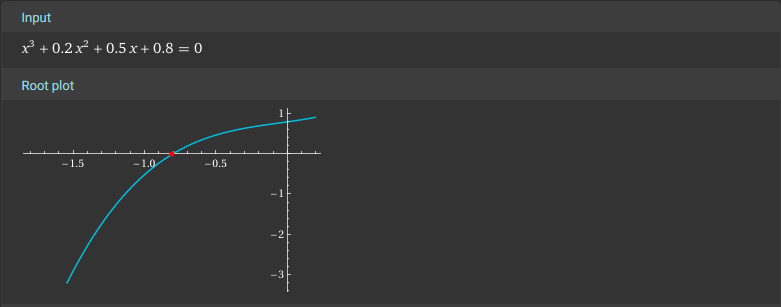

Визначаємо, що точка знаходится на відрізку [-1, -0.5]


In [41]:
def f(x: float):
    return x**3 + 0.2 * x**2 + 0.5 * x + 0.8

def fprime(x: float):
    return nd.Derivative(f, n=1)

def phi(x: float):
    # c = -0.5
    return x - 0.5 * f(x)

def iterate_fixed_point(x0: float, iters: int = 5):
    xs = [x0]
    x = x0
    for _ in range(iters):
        x = phi(x)
        xs.append(x)
    return xs

def error_bound(x_last: float) -> float:

    mu = 2.0
    return abs(f(x_last)) / mu



In [45]:
def main():
    x0 = -1.0
    iters = 5
    xs = iterate_fixed_point(x0, iters)
    print("Fixed-point iteration for f(x) = x**3 + 0.2 * x**2 + 0.5 * x + 0.8 with phi(x) = x - 0.5*f(x)")
    print(f"Interval: [-1, -0.5], start x0 = {x0}")
    for i, xi in enumerate(xs):
        if i == 0:
            print(f"x_{i} = {xi:.10f}")
        else:
            print(f"x_{i} = phi(x_{i-1}) = {xi:.10f}")
    bound = error_bound(xs[-1])
    print("\nError bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ")
    print(f"f(x5) = {f(xs[-1]):.10f},  μ = 0.5  ⇒  |ξ - x5| ≤ {bound:.10f}")
    return xs[-1], bound

if __name__ == "__main__":
    root_approx, bound = main()

Fixed-point iteration for f(x) = x**3 + 0.2 * x**2 + 0.5 * x + 0.8 with phi(x) = x - 0.5*f(x)
Interval: [-1, -0.5], start x0 = -1.0
x_0 = -1.0000000000
x_1 = phi(x_0) = -0.7500000000
x_2 = phi(x_1) = -0.8078125000
x_3 = phi(x_2) = -0.8075419979
x_4 = phi(x_3) = -0.8075601157
x_5 = phi(x_4) = -0.8075589073

Error bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ
f(x5) = 0.0000001612,  μ = 0.5  ⇒  |ξ - x5| ≤ 0.0000000806


Спрощений варіант коду


In [47]:
# Рівняння: f(x) = x**3 + 0.2 * x**2 + 0.5 * x + 0.8
# Ітераційна функція: φ(x) = x - 0.5 * f(x)  (c = -0.5)
# Початкове наближення: x0 = -1
# Кількість ітерацій: 5
# Оцінка похибки: |ξ - x5| ≤ |f(x5)| / μ, де μ = min_{[-1,-0.5]} |f'(x)| = 0.5

def f(x):
    return x**3 + 0.2 * x**2 + 0.5 * x + 0.8

def phi(x):
    return x - 0.5 * f(x)   # c = -0.5

def fixed_point(x0=-1.0, iters=5):
    xs = [x0]
    for _ in range(iters):
        xs.append(phi(xs[-1]))
    return xs

# Запуск і вивід результатів
xs = fixed_point(-1.0, 5)

for i, xi in enumerate(xs):
    print(f"x_{i} = {xi:.10f}")

# Похибка методу простої ітерації після 5-ї ітерації
mu = 2.0
err_bound = abs(f(xs[-1]))/mu
print(f"\nОцінка похибки: |ξ - x5| ≤ {err_bound:.10f}")

x_0 = -1.0000000000
x_1 = -0.7500000000
x_2 = -0.8078125000
x_3 = -0.8075419979
x_4 = -0.8075601157
x_5 = -0.8075589073

Оцінка похибки: |ξ - x5| ≤ 0.0000000806
